# VARMA(p,q)
## Vector Autoregressive Moving Average
This lesson picks up where VAR(p) left off.

The system of equations for a 2-dimensional VAR(1) model is:

&nbsp;&nbsp;&nbsp;&nbsp;$y_{1,t} = c_1 + \phi_{11,1}y_{1,t-1} + \phi_{12,1}y_{2,t-1} + \varepsilon_{1,t}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$y_{2,t} = c_2 + \phi_{21,1}y_{1,t-1} + \phi_{22,1}y_{2,t-1} + \varepsilon_{2,t}$

where the coefficient $\phi_{ii,l}$ captures the influence of the $l$th lag of variable $y_i$ on itself,<br>
the coefficient $\phi_{ij,l}$ captures the influence of the $l$th lag of variable $y_j$ on $y_i$.<br>
Most importantly, $\varepsilon_{1,t}$ and $\varepsilon_{2,t}$ are white noise processes that may be correlated.<br>

In a <strong>VARMA(p,q)</strong> model we give the error terms $\varepsilon_t$ a moving average representation of order $q$.


### Formulation
We've seen that an autoregressive moving average ARMA(p,q) model is described by the following:

&nbsp;&nbsp;&nbsp;&nbsp; $y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \dots + \phi_{p}y_{t-p} + \theta_{1}\varepsilon_{t-1} + \theta_{2}\varepsilon_{t-2} + \dots + \theta_{q}\varepsilon_{t-q} + \varepsilon_{t}$

A $K$-dimensional VARMA model of order $(p,q)$ considers each variable $y_K$ in the system.<br>

For example, the system of equations for a 2-dimensional VARMA(1,1) model is:

&nbsp;&nbsp;&nbsp;&nbsp;$y_{1,t} = c_1 + \phi_{11,1}y_{1,t-1} + \phi_{12,1}y_{2,t-1} + \theta_{11,1}\varepsilon_{1,t-1} + \theta_{12,1}\varepsilon_{2,t-1} + \varepsilon_{1,t}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$y_{2,t} = c_2 + \phi_{21,1}y_{1,t-1} + \phi_{22,1}y_{2,t-1} + \theta_{21,1}\varepsilon_{1,t-1} + \theta_{22,1}\varepsilon_{2,t-1} + \varepsilon_{2,t}$

where the coefficient $\theta_{ii,l}$ captures the influence of the $l$th lag of error $\varepsilon_i$ on itself,<br>
the coefficient $\theta_{ij,l}$ captures the influence of the $l$th lag of error $\varepsilon_j$ on $\varepsilon_i$,<br>
and $\varepsilon_{1,t}$ and $\varepsilon_{2,t}$ are residual white noise.<br>


The general steps involved in building a VARMA model are:
* Examine the data
* Visualize the data
* Test for stationarity
* If necessary, transform the data to make it stationary
* Select the appropriate <em>p</em> and <em>q</em> orders
* Instantiate the model and fit it to a training set
* If necessary, invert the earlier transformation
* Evaluate model predictions against a known test set
* Forecast the future

<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.varmax.VARMAX.html'>
varmax.VARMAX</a></strong><font color=black>(endog[, exog, order, trend, …])</font>&nbsp;&nbsp;Vector Autoregressive Moving Average with eXogenous regressors model<br>
<strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.varmax.VARMAXResults.html'>
varmax.VARMAXResults</a></strong><font color=black>(model, params[, …])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Class to hold results from fitting an VARMAX model<br>
</tt>
   
<h3>For Further Reading:</h3>
<strong>
<a href='https://www.statsmodels.org/stable/statespace.html#vector-autoregressive-moving-average-with-exogenous-regressors-varmax'>Statsmodels Tutorial:</a></strong>&nbsp;&nbsp;<font color=black>Time Series Analysis by State Space Methods</font><br>
<strong>
<a href='https://www.statsmodels.org/stable/examples/notebooks/generated/statespace_varmax.html'>Statsmodels Example:</a></strong>&nbsp;&nbsp;<font color=black>VARMAX models</font><br>
</div>

In [114]:
import numpy as np
import pandas as pd
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.varmax import VARMAX, VARMAXResults
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")



In [134]:
# Load bank AK00100001_06MCD10K datasets
df = pd.read_csv('AK00100001_06MCD10K.csv')
df['surveydate']=pd.to_datetime(df['surveydate'])
df.set_index('surveydate',inplace=True)
df=df.asfreq('W-WED')
df=df.fillna(method = 'ffill', axis = 0) # fill the 8 NaN value with forwarding values 
df=df.drop(columns=['accountnumber','productcode','INST_NM','branchType'])
df

,rate
surveydate,
1999-10-27,4.86
1999-11-03,4.86
1999-11-10,4.86
1999-11-17,4.76
1999-11-24,4.76
1999-12-01,4.76
1999-12-08,4.76
1999-12-15,4.86
1999-12-22,4.86


In [135]:
#Load 10 year Treasury rates (constant maturity).  

TR10 = pd.read_csv('WGS10YR.csv')
TR10['DATE']=pd.to_datetime(TR10['DATE'])
TR10.set_index('DATE',inplace=True)

TR10_1=TR10.loc['1999-10-29':'2018-05-09']

TR10_1=TR10_1.asfreq('W-FRI')

TR10_1.set_index(df.index,inplace=True)
TR10=TR10_1
TR10

,WGS10YR
surveydate,
1999-10-27,6.16
1999-11-03,6.00
1999-11-10,5.96
1999-11-17,6.02
1999-11-24,6.10
1999-12-01,6.20
1999-12-08,6.13
1999-12-15,6.24
1999-12-22,6.39


In [136]:
# Load 1 year Treasury rates (constant maturity).  
TR1 = pd.read_csv('WGS1YR.csv')
TR1['DATE']=pd.to_datetime(TR1['DATE'])
TR1.set_index('DATE',inplace=True)

TR1_1=TR1.loc['1999-10-29':'2018-05-09']

TR1_1=TR1_1.asfreq('W-FRI')

TR1_1.set_index(df.index,inplace=True)
TR1=TR1_1
TR1

,WGS1YR
surveydate,
1999-10-27,5.51
1999-11-03,5.45
1999-11-10,5.50
1999-11-17,5.56
1999-11-24,5.65
1999-12-01,5.73
1999-12-08,5.69
1999-12-15,5.85
1999-12-22,5.97


In [137]:
# Load Federal funds rate 

FR = pd.read_csv('FF.csv')
FR['DATE']=pd.to_datetime(FR['DATE'])
FR.set_index('DATE',inplace=True)

FR_1=FR.loc['1999-10-27':'2018-05-02']

FR1_1=FR_1.asfreq('W-WED')

FR=FR1_1
FR

,FF
DATE,
1999-10-27,5.18
1999-11-03,5.27
1999-11-10,5.20
1999-11-17,5.44
1999-11-24,5.52
1999-12-01,5.63
1999-12-08,5.45
1999-12-15,5.44
1999-12-22,5.46


### Inspect the data

In [138]:
df = df.join(TR1).join(TR10).join(FR)
df.head()

,rate,WGS1YR,WGS10YR,FF
surveydate,,,,
1999-10-27,4.86,5.51,6.16,5.18
1999-11-03,4.86,5.45,6.00,5.27
1999-11-10,4.86,5.50,5.96,5.20
1999-11-17,4.76,5.56,6.02,5.44
1999-11-24,4.76,5.65,6.10,5.52


In [139]:
df = df.dropna()
df.shape

(967, 4)

### Plot the source data

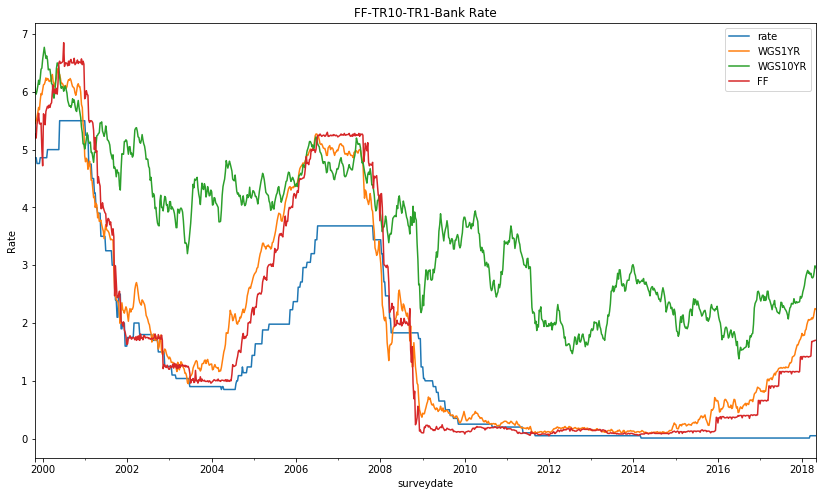

In [140]:
title='FF-TR10-TR1-Bank Rate'
ylabel='Rate'
xlabel='Time(By Week)'

ax = df['rate'].plot(figsize=(14,8),title=title,legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
df['WGS1YR'].plot(legend=True);
df['WGS10YR'].plot(legend=True);
df['FF'].plot(legend=True);

In [141]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
# For Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

In [142]:
df.iplot()

# Check the correlation among the different rates

In [143]:
import seaborn as sns
%matplotlib inline

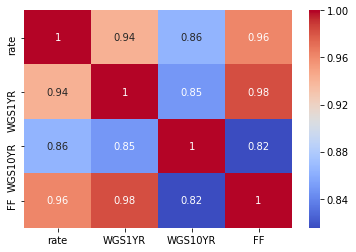

In [144]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [145]:
df=df.drop(columns=['WGS1YR'])

In [146]:
df

,rate,WGS10YR,FF
surveydate,,,
1999-10-27,4.86,6.16,5.18
1999-11-03,4.86,6.00,5.27
1999-11-10,4.86,5.96,5.20
1999-11-17,4.76,6.02,5.44
1999-11-24,4.76,6.10,5.52
1999-12-01,4.76,6.20,5.63
1999-12-08,4.76,6.13,5.45
1999-12-15,4.86,6.24,5.44
1999-12-22,4.86,6.39,5.46


## Test for stationarity, perform any necessary transformations
In the previous section we applied the augmented Dickey-Fuller test and found that a second-order difference achieved stationarity. In this section we'll perform the <strong>auto_arima</strong> prediction to identify optimal $p$ and $q$ orders.

In [147]:
# INCLUDED HERE IF YOU CHOOSE TO USE IT
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [148]:
adf_test(df['rate'],title='rate')

Augmented Dickey-Fuller Test: rate
ADF test statistic       -2.537717
p-value                   0.106565
# lags used              19.000000
# observations          947.000000
critical value (1%)      -3.437274
critical value (5%)      -2.864597
critical value (10%)     -2.568398
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [149]:
adf_test(df['WGS10YR'],title='WGS10YR')

Augmented Dickey-Fuller Test: WGS10YR
ADF test statistic       -2.093854
p-value                   0.246993
# lags used               1.000000
# observations          965.000000
critical value (1%)      -3.437145
critical value (5%)      -2.864540
critical value (10%)     -2.568367
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [151]:
# adf_test(df['WGS1YR'],title='WGS1YR')

In [150]:
adf_test(df['FF'],title='FF')

Augmented Dickey-Fuller Test: FF
ADF test statistic       -2.137001
p-value                   0.229899
# lags used               8.000000
# observations          958.000000
critical value (1%)      -3.437194
critical value (5%)      -2.864562
critical value (10%)     -2.568379
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


<div class="alert alert-info"><strong>NOTE: </strong> When performing the auto_arima function we're likely to see a <tt><font color=black>ConvergenceWarning: Maximum Likelihood optimization failed to converge.</font></tt> This is not unusual in models which have to estimate a large number of parameters. However, we can override the maximum iterations default of 50, and pass an arbitrarily large number with <tt>maxiter=1000</tt>. We'll see this come up again when we fit our model.</div>  

In [132]:
auto_arima(df['rate'],maxiter=1000)

ARIMA(callback=None, disp=0, maxiter=1000, method=None, order=(2, 1, 1),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(0, 0, 0, 1), solver='lbfgs', start_params=None,
      suppress_warnings=False, transparams=True, trend=None,
      with_intercept=True)

In [133]:
# auto_arima(df['WGS1YR'],maxiter=1000)

ARIMA(callback=None, disp=0, maxiter=1000, method=None, order=(4, 2, 5),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(0, 0, 0, 1), solver='lbfgs', start_params=None,
      suppress_warnings=False, transparams=True, trend=None,
      with_intercept=True)

In [152]:
auto_arima(df['WGS10YR'],maxiter=1000)

ARIMA(callback=None, disp=0, maxiter=1000, method=None, order=(1, 1, 0),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(0, 0, 0, 1), solver='lbfgs', start_params=None,
      suppress_warnings=False, transparams=True, trend=None,
      with_intercept=True)

In [153]:
auto_arima(df['FF'],maxiter=1000)

ARIMA(callback=None, disp=0, maxiter=1000, method=None, order=(3, 1, 2),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(0, 0, 0, 1), solver='lbfgs', start_params=None,
      suppress_warnings=False, transparams=True, trend=None,
      with_intercept=True)

#### It looks like a VARMA(3,2) model is recommended. Note that the $d$ term (1 for Bank rate, 2 for WGS1YR,1 for WGS10YR and FF  ) is about to be addressed by transforming the data to make it stationary. As before we'll apply a second order difference.

In [110]:
df_transformed = df.diff().diff()
df_transformed = df_transformed.dropna()
df_transformed.head()

,rate,WGS1YR,WGS10YR,FF
surveydate,,,,
1999-11-10,0.0,0.11,0.12,-0.16
1999-11-17,-0.1,0.01,0.10,0.31
1999-11-24,0.1,0.03,0.02,-0.16
1999-12-01,0.0,-0.01,0.02,0.03
1999-12-08,0.0,-0.12,-0.17,-0.29


In [111]:
len(df_transformed)

965

## Train/test/split
It is useful to define a number of observations variable for our test set. For this analysis, let's use 52 weeks.

In [154]:
nobs=52
train, test = df_transformed[0:-nobs], df_transformed[-nobs:]

In [155]:
print(train.shape)
print(test.shape)

(913, 4)
(52, 4)


## Fit the VARMA(3,2) Model
This may take awhile.

In [156]:
model = VARMAX(train, order=(3,2), trend='c')
results = model.fit(maxiter=1000, disp=False)
results.summary()

Dep. Variable:,"['rate', 'WGS1YR', 'WGS10YR', 'FF']",No. Observations:,913
Model:,"VARMA(3,2)",Log Likelihood,4065.193
,+ intercept,AIC,-7942.386
Date:,"Sun, 18 Aug 2019",BIC,-7489.613
Time:,22:16:55,HQIC,-7769.542
Sample:,11-10-1999,,
,- 05-03-2017,,
Covariance Type:,opg,,
Ljung-Box (Q):,"96.07, 107.78, 125.36, 109.15",Jarque-Bera (JB):,"16555.97, 2991.44, 242.04, 11597.29"
Prob(Q):,"0.00, 0.00, 0.00, 0.00",Prob(JB):,"0.00, 0.00, 0.00, 0.00"
Heteroskedasticity (H):,"0.02, 0.14, 0.86, 0.07",Skew:,"-0.59, -0.49, -0.11, -1.49"


## Predict the next 52 values
Unlike the VAR model we used in the previous section, the VARMAX <tt>.forecast()</tt> function won't require that we pass in a number of previous observations, and it will provide an extended DateTime index.

In [158]:
df_forecast = results.forecast(52)
df_forecast

,rate,WGS1YR,WGS10YR,FF
2017-05-10,0.014287,-0.021180,-0.036512,0.085512
2017-05-17,0.004095,-0.011880,0.005907,-0.011463
2017-05-24,0.000094,0.008909,0.014374,-0.029921
2017-05-31,-0.010571,0.000468,-0.012928,0.005111
2017-06-07,0.003209,-0.002479,0.005206,0.011691
2017-06-14,0.001898,-0.001452,0.003477,-0.006374
2017-06-21,-0.000867,-0.000559,-0.002987,-0.002369
2017-06-28,-0.002405,-0.001508,-0.001773,0.001232
2017-07-05,0.000573,-0.000629,0.002493,0.000041
2017-07-12,-0.000415,-0.000788,0.000346,-0.001671


## Invert the Transformation
Remember that the forecasted values represent second-order differences. To compare them to the original data we have to roll back each difference. To roll back a first-order difference we take the most recent value on the training side of the original series, and add it to a cumulative sum of forecasted values. When working with second-order differences we first must perform this operation on the most recent first-order difference.

Here we'll use the <tt>nobs</tt> variable we defined during the train/test/split step.

In [206]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['rate1d'] = (df['rate'].iloc[-nobs-1]-df['rate'].iloc[-nobs-2]) + df_forecast['rate'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['rateForecast'] = df['rate'].iloc[-nobs-1] + df_forecast['rate'].cumsum()

In [207]:
df_forecast

,rate,WGS1YR,WGS10YR,FF,rate1d,rateForecast,WGS10YR1d,WGS10YRForecast,FF1d,FFForecast,WGS10YR10d,FForecast
2017-05-10,0.014287,-0.021180,-0.036512,0.085512,0.014287,0.024287,-0.016512,2.293488,0.055512,0.965512,-0.016512,0.965512
2017-05-17,0.004095,-0.011880,0.005907,-0.011463,0.018382,0.028382,-0.010605,2.299395,0.044049,0.954049,-0.010605,0.954049
2017-05-24,0.000094,0.008909,0.014374,-0.029921,0.018476,0.028476,0.003769,2.313769,0.014128,0.924128,0.003769,0.924128
2017-05-31,-0.010571,0.000468,-0.012928,0.005111,0.007905,0.017905,-0.009159,2.300841,0.019239,0.929239,-0.009159,0.929239
2017-06-07,0.003209,-0.002479,0.005206,0.011691,0.011114,0.021114,-0.003953,2.306047,0.030931,0.940931,-0.003953,0.940931
2017-06-14,0.001898,-0.001452,0.003477,-0.006374,0.013012,0.023012,-0.000476,2.309524,0.024557,0.934557,-0.000476,0.934557
2017-06-21,-0.000867,-0.000559,-0.002987,-0.002369,0.012145,0.022145,-0.003463,2.306537,0.022188,0.932188,-0.003463,0.932188
2017-06-28,-0.002405,-0.001508,-0.001773,0.001232,0.009740,0.019740,-0.005236,2.304764,0.023420,0.933420,-0.005236,0.933420
2017-07-05,0.000573,-0.000629,0.002493,0.000041,0.010312,0.020312,-0.002743,2.307257,0.023460,0.933460,-0.002743,0.933460
2017-07-12,-0.000415,-0.000788,0.000346,-0.001671,0.009897,0.019897,-0.002398,2.307602,0.021790,0.931790,-0.002398,0.931790


In [170]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['WGS10YR10d'] = (df['WGS10YR'].iloc[-nobs-1]-df['WGS10YR'].iloc[-nobs-2]) + df_forecast['WGS10YR'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['WGS10YRForecast'] = df['WGS10YR'].iloc[-nobs-1] + df_forecast['WGS10YR'].cumsum()

In [205]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
#df_forecast['WGS1YR1d'] = (df['WGS1YR'].iloc[-nobs-1]-df['WGS1YR'].iloc[-nobs-2]) + df_forecast['WGS1YR'].cumsum()

# Now build the forecast values from the first difference set
#df_forecast['WGS1YRForecast'] = df['WGS1YR'].iloc[-nobs-1] + df_forecast['WGS1YR'].cumsum()

In [174]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['FF1d'] = (df['FF'].iloc[-nobs-1]-df['FF'].iloc[-nobs-2]) + df_forecast['FF'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['FFForecast'] = df['FF'].iloc[-nobs-1] + df_forecast['FF'].cumsum()

In [175]:
df_forecast

,rate,WGS1YR,WGS10YR,FF,rate1d,rateForecast,WGS10YR1d,WGS10YRForecast,FF1d,FFForecast,WGS10YR10d,FForecast
2017-05-10,0.014287,-0.021180,-0.036512,0.085512,0.014287,0.024287,-0.016512,2.293488,0.055512,0.965512,-0.016512,0.965512
2017-05-17,0.004095,-0.011880,0.005907,-0.011463,0.018382,0.028382,-0.010605,2.299395,0.044049,0.954049,-0.010605,0.954049
2017-05-24,0.000094,0.008909,0.014374,-0.029921,0.018476,0.028476,0.003769,2.313769,0.014128,0.924128,0.003769,0.924128
2017-05-31,-0.010571,0.000468,-0.012928,0.005111,0.007905,0.017905,-0.009159,2.300841,0.019239,0.929239,-0.009159,0.929239
2017-06-07,0.003209,-0.002479,0.005206,0.011691,0.011114,0.021114,-0.003953,2.306047,0.030931,0.940931,-0.003953,0.940931
2017-06-14,0.001898,-0.001452,0.003477,-0.006374,0.013012,0.023012,-0.000476,2.309524,0.024557,0.934557,-0.000476,0.934557
2017-06-21,-0.000867,-0.000559,-0.002987,-0.002369,0.012145,0.022145,-0.003463,2.306537,0.022188,0.932188,-0.003463,0.932188
2017-06-28,-0.002405,-0.001508,-0.001773,0.001232,0.009740,0.019740,-0.005236,2.304764,0.023420,0.933420,-0.005236,0.933420
2017-07-05,0.000573,-0.000629,0.002493,0.000041,0.010312,0.020312,-0.002743,2.307257,0.023460,0.933460,-0.002743,0.933460
2017-07-12,-0.000415,-0.000788,0.000346,-0.001671,0.009897,0.019897,-0.002398,2.307602,0.021790,0.931790,-0.002398,0.931790


In [185]:
pd.concat([df.iloc[-52:],df_forecast[['rateForecast','WGS10YRForecast','FFForecast']]],axis=1)

,rate,WGS10YR,FF,rateForecast,WGS10YRForecast,FFForecast
surveydate,,,,,,
2017-05-10,0.01,2.39,0.91,0.024287,2.293488,0.965512
2017-05-17,0.01,2.27,0.91,0.028382,2.299395,0.954049
2017-05-24,0.01,2.26,0.91,0.028476,2.313769,0.924128
2017-05-31,0.01,2.20,0.90,0.017905,2.300841,0.929239
2017-06-07,0.01,2.18,0.91,0.021114,2.306047,0.940931
2017-06-14,0.01,2.18,0.91,0.023012,2.309524,0.934557
2017-06-21,0.01,2.16,1.16,0.022145,2.306537,0.932188
2017-06-28,0.01,2.23,1.16,0.019740,2.304764,0.933420
2017-07-05,0.01,2.36,1.12,0.020312,2.307257,0.933460


## Plot the results

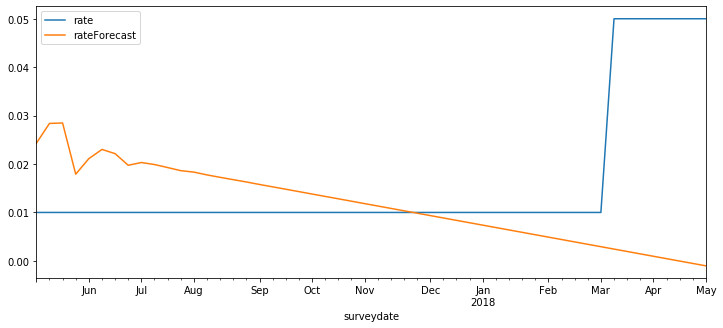

In [177]:
df['rate'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['rateForecast'].plot(legend=True);

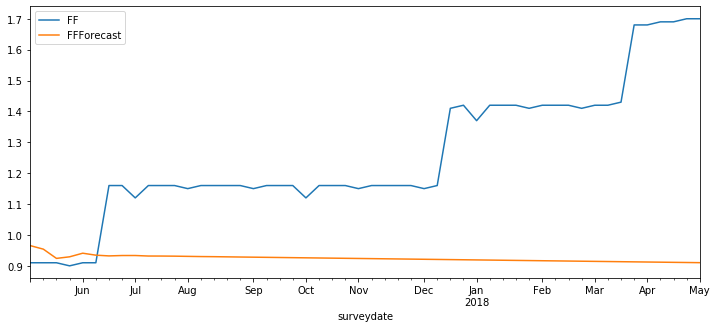

In [179]:
df['FF'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['FFForecast'].plot(legend=True);

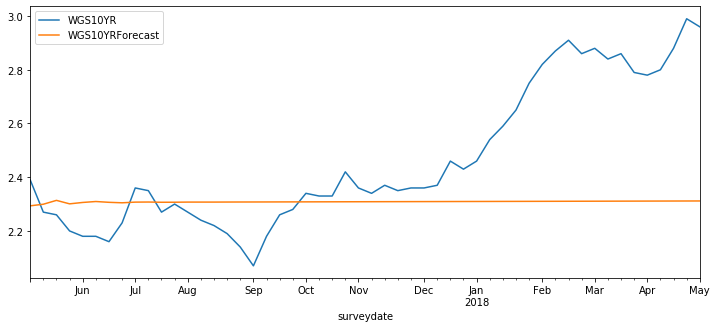

In [180]:
df['WGS10YR'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['WGS10YRForecast'].plot(legend=True);

In [186]:
# df['WGS1YR'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
# df_forecast['WGS1YRForecast'].plot(legend=True);

### Evaluate the model

&nbsp;&nbsp;&nbsp;&nbsp;$RMSE = \sqrt{{\frac 1 L} \sum\limits_{l=1}^L (y_{T+l} - \hat y_{T+l})^2}$<br><br>
where $T$ is the last observation period and $l$ is the lag.

In [187]:
RMSE1 = rmse(df['rate'][-nobs:], df_forecast['rateForecast'])
print(f'rate VAR(5) RMSE: {RMSE1:.3f}')

Money VAR(5) RMSE: 0.021


In [189]:
RMSE2 = rmse(df['FF'][-nobs:], df_forecast['FFForecast'])
print(f'rate VAR(5) RMSE: {RMSE2:.3f}')

rate VAR(5) RMSE: 0.404


In [190]:
RMSE2 = rmse(df['WGS10YR'][-nobs:], df_forecast['FFForecast'])
print(f'WGS10YR VAR(5) RMSE: {RMSE2:.3f}')

WGS10YR VAR(5) RMSE: 1.562



## Let's compare these results to individual ARMA(3,2) models

In [191]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults

### Money

In [192]:
model = ARMA(train['rate'],order=(3,2))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   rate   No. Observations:                  913
Model:                     ARMA(3, 2)   Log Likelihood                1213.893
Method:                       css-mle   S.D. of innovations              0.064
Date:                Sun, 18 Aug 2019   AIC                          -2413.786
Time:                        22:48:57   BIC                          -2380.069
Sample:                    11-10-1999   HQIC                         -2400.915
                         - 05-03-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.823e-06      0.000     -0.017      0.987      -0.000       0.000
ar.L1.rate     0.1322      0.168      0.787      0.432      -0.197       0.461
ar.L2.rate    -0.0477      0.040     -1.183      0.237      -0.127       0.031
ar.L3.rate    -0.1097      0.039     -2.824      0.005      -0.186      -0.034
ma.L1.rate    -1.1734      0.166     -7.050      0.000      -1.500      -0.847
ma.L2.rate     0.2543      0.156      1.630      0.103      -0.051       0.560
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0065           -1.6462j            1.9295           -0.1627
AR.2            1.0065           +1.6462j            1.9295            0.1627
AR.3           -2.4478           -0.0000j            2.4478           -0.5000
MA.1            1.1279           +0.0000j            1.1279            0.0000
MA.2            3.4869           +0.0000j            3.4869            0.0000
-----------------------------------------------------------------------------
"""

In [193]:
start=len(train)
end=len(train)+len(test)-1
z1 = results.predict(start=start, end=end).rename('rate')
z1 = pd.DataFrame(z1)

In [194]:
z1

,rate
2017-05-10,-3.577550e-05
2017-05-17,1.474624e-06
2017-05-24,-9.920072e-07
2017-05-31,8.302672e-07
2017-06-07,-2.898732e-06
2017-06-14,-3.207811e-06
2017-06-21,-3.270681e-06
2017-06-28,-2.855053e-06
2017-07-05,-2.763211e-06
2017-07-12,-2.764007e-06


### Invert the Transformation, Evaluate the Forecast

In [195]:
# Add the most recent first difference from the training set to the forecast cumulative sum
z1['rate1d'] = (df['rate'].iloc[-nobs-1]-df['rate'].iloc[-nobs-2]) + z1['rate'].cumsum()

# Now build the forecast values from the first difference set
z1['rateForecast'] = df['rate'].iloc[-nobs-1] + z1['rate1d'].cumsum()

In [196]:
z1

,rate,rate1d,rateForecast
2017-05-10,-3.577550e-05,-0.000036,0.009964
2017-05-17,1.474624e-06,-0.000034,0.009930
2017-05-24,-9.920072e-07,-0.000035,0.009895
2017-05-31,8.302672e-07,-0.000034,0.009860
2017-06-07,-2.898732e-06,-0.000037,0.009823
2017-06-14,-3.207811e-06,-0.000041,0.009782
2017-06-21,-3.270681e-06,-0.000044,0.009738
2017-06-28,-2.855053e-06,-0.000047,0.009692
2017-07-05,-2.763211e-06,-0.000049,0.009642
2017-07-12,-2.764007e-06,-0.000052,0.009590


In [197]:
RMSE3 = rmse(df['rate'][-nobs:], z1['rateForecast'])

print(f'rate VARMA(3,2) RMSE: {RMSE1:.3f}')
print(f'rate  ARMA(3,2) RMSE: {RMSE3:.3f}')

rate VARMA(3,2) RMSE: 0.021
rate  ARMA(3,2) RMSE: 0.018


## Personal Spending

In [199]:
model = ARMA(train['FF'],order=(3,2))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                     FF   No. Observations:                  913
Model:                     ARMA(3, 2)   Log Likelihood                 778.838
Method:                       css-mle   S.D. of innovations              0.103
Date:                Sun, 18 Aug 2019   AIC                          -1543.676
Time:                        22:51:25   BIC                          -1509.959
Sample:                    11-10-1999   HQIC                         -1530.805
                         - 05-03-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.571e-05      0.000     -0.079      0.937      -0.000       0.000
ar.L1.FF       0.2165      0.192      1.130      0.259      -0.159       0.592
ar.L2.FF      -0.0972      0.058     -1.663      0.097      -0.212       0.017
ar.L3.FF       0.0340      0.055      0.618      0.537      -0.074       0.142
ma.L1.FF      -1.3930      0.188     -7.400      0.000      -1.762      -1.024
ma.L2.FF       0.4417      0.174      2.541      0.011       0.101       0.782
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.3050           -2.8955j            2.9115           -0.2667
AR.2           -0.3050           +2.8955j            2.9115            0.2667
AR.3            3.4671           -0.0000j            3.4671           -0.0000
MA.1            1.1053           +0.0000j            1.1053            0.0000
MA.2            2.0483           +0.0000j            2.0483            0.0000
-----------------------------------------------------------------------------
"""

In [200]:
start=len(train)
end=len(train)+len(test)-1
z2 = results.predict(start=start, end=end).rename('FF')
z2 = pd.DataFrame(z2)
z2

,FF
2017-05-10,0.063894
2017-05-17,-0.009522
2017-05-24,-0.009306
2017-05-31,0.001072
2017-06-07,0.000799
2017-06-14,-0.000261
2017-06-21,-0.000111
2017-06-28,0.000015
2017-07-05,-0.000008
2017-07-12,-0.000020


### Invert the Transformation, Evaluate the Forecast

In [201]:
# Add the most recent first difference from the training set to the forecast cumulative sum
z2['FF1d'] = (df['FF'].iloc[-nobs-1]-df['FF'].iloc[-nobs-2]) + z2['FF'].cumsum()

# Now build the forecast values from the first difference set
z2['FFFecast'] = df['FF'].iloc[-nobs-1] + z2['FF1d'].cumsum()

In [202]:
z2

,FF,FF1d,FFFecast
2017-05-10,0.063894,0.033894,0.913894
2017-05-17,-0.009522,0.024372,0.938266
2017-05-24,-0.009306,0.015066,0.953331
2017-05-31,0.001072,0.016138,0.969469
2017-06-07,0.000799,0.016937,0.986406
2017-06-14,-0.000261,0.016676,1.003082
2017-06-21,-0.000111,0.016565,1.019647
2017-06-28,0.000015,0.016580,1.036227
2017-07-05,-0.000008,0.016572,1.052799
2017-07-12,-0.000020,0.016552,1.069351


In [204]:
RMSE4 = rmse(df['FF'][-nobs:], z2['FFFecast'])

print(f'FF VARMA(3,2) RMSE: {RMSE2:.3f}')
print(f'FF  ARMA(3,2) RMSE: {RMSE4:.3f}')

FF VARMA(3,2) RMSE: 1.562
FF  ARMA(3,2) RMSE: 0.128


<strong>CONCLUSION:</strong> It looks like the VARMA(3,2) model did a relatively poor job compared to simpler alternatives. This tells us that there is little or no interdepence among bank rate and Federal funds rate ,  the 1 year and 10 year Treasury rates, at least for the timespan we investigated. This is helpful! By fitting a model and getting poor results we know more about the data than we did before.